In [18]:
# import some packages

import time
import pandas as pd
import numpy as np
import random
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid") #set style for seaborn
pd.set_option('display.max_columns', None) #show all columns pandas

# Read in data

In [19]:
ad_data_all = pd.read_csv("data/data_clean.csv", low_memory = False)

Number of ads in our data:

In [20]:
len(ad_data_all)

10883

In [21]:
ad_data_all.head()

,address,postcode_city,postcode,City,city,ad_link,ad_download_date_time,Asking price,Original asking price,price,sqm_price,Living area,livingArea,Plot size,Area,Volume in cubic meters,h_type,Kind of house,Type apartment,Number of stories,Located at,Location,Building type,Year of construction,Construction period,Number of rooms,Number of bath rooms,Bathroom facilities,External storage space,Garden,Front garden,Back garden,Garden location,Balcony/roof garden,Sun terrace,Shed / storage,Patio/atrium,Exterior space attached to the building,Type of parking facilities,Type of garage,Other space inside the building,Facilities,Facilities.2,Ownership situation,Accessibility,Specific,Type of roof,energy_label,Provisional energy label,Insulation,Heating,CH boiler,Hot water,VVE (Owners Association) contribution,Registration with KvK,Annual meeting,Periodic contribution,Reserve fund present,Maintenance plan,Building insurance,Service charges,Fees,Quality marks,Purchase combination,Commercial property,Consulting rooms,Office space,Retail space
0,Ben Websterstraat 16,3069 XJ Rotterdam,3069 XJ,Rotterdam,rotterdam,https://www.funda.nl/en/koop/rotterdam/huis-42...,20220125_212533,"€ 400,000 kosten koper",NaN,400000,3279.0,122 m²,122,156 m²,156 m²,399 m³,huis,"Single-family home, corner house (kwadrant won...",NaN,3 stories and a loft,NaN,Sheltered location and in residential district,Resale property,1987,NaN,4 rooms (3 bedrooms),2 bathrooms,Bath and 2 toilets,15 m²,Front garden and side garden,72 m² (6 meter deep and 12 meter broad),NaN,Located at the west,NaN,NaN,Detached wooden storage,NaN,NaN,Public parking,NaN,NaN,"Air conditioning, outdoor awning, skylight, me...",NaN,Full ownership,Disabled access friendly and accessible for se...,Partly furnished with carpets and curtains,Gable roof covered with roof tiles,B,NaN,"Roof insulation, double glazing, insulated wal...",Fireplace and district heating,NaN,District heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Laagjes 11,3076 BJ Rotterdam,3076 BJ,Rotterdam,rotterdam,https://www.funda.nl/en/koop/rotterdam/huis-88...,20220125_212558,"€ 650,000 kosten koper",NaN,650000,3801.0,171 m²,171,282 m²,282 m²,"1,640 m³",huis,"Single-family home, row house (official/compan...",NaN,2 stories,NaN,In residential district,Resale property,1982,NaN,5 rooms (3 bedrooms),2 separate toilets,NaN,NaN,NaN,NaN,NaN,NaN,Roof terrace present,NaN,Built-in,NaN,78 m²,Parking on private property and public parking,Built-in,229 m²,Rolldown shutters and solar panels,Electrical door and electricity,Full ownership,NaN,NaN,Flat roof covered with asphalt roofing,N,NaN,Mostly double glazed,CH boiler,"HR ( combination boiler from 2017, in ownership)",CH boiler and gas-fired boiler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bergweg 41 d,3037 EA Rotterdam,3037 EA,Rotterdam,rotterdam,https://www.funda.nl/en/koop/rotterdam/apparte...,20220125_212607,"€ 525,000 kosten koper",NaN,525000,3571.0,147 m²,147,NaN,NaN,495 m³,appartement,NaN,Ground-floor apartment (apartment),2 stories,Ground floor,NaN,Resale property,1935,NaN,5 rooms (3 bedrooms),NaN,NaN,NaN,Back garden,NaN,"19 m² (3,35 meter deep and 5,6 meter broad)",Located at the west,NaN,NaN,NaN,NaN,NaN,Paid parking and public parking,NaN,NaN,NaN,NaN,Full ownership,NaN,NaN,NaN,A,NaN,Double glazing,CH boiler,"Gas-fired combination boiler from 2021, in own...",CH boiler,NaN,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Molensingel 94,3043 KC Rotterdam,3043 KC,Rotterdam,rotterdam,https://www.funda.nl/en/koop/rotterdam/apparte...,20220125_212616,"€ 295,000 kosten koper",NaN,295000,3598.0,82 m²,82,NaN,NaN,320 m³,appartement,NaN,Upstairs apartment (apartment),3 stories,1st floor,"Alongside park, alongside a quiet road, in res...",Resale property,1938,NaN,4 rooms (3 bedrooms),1 bathroom and 1 separate toilet,Shower,4 m²,NaN,NaN,NaN,NaN,NaN,NaN,Detached wooden storage,NaN,3 m²,Public parking,NaN,10 m²,NaN,NaN,Full ownership,NaN,NaN,Gable roof covered

# Look at some very basic statistics of the columns

In [22]:
# percentile list
perc =[.10, .25, .50, .75, .90]
  
# list of dtypes to include
include =['object', 'float', 'int', 'int64']

# calling describe method
desc = ad_data_all.describe(percentiles = perc, include = include)
  
# display
desc.round(2)

,address,postcode_city,postcode,City,city,ad_link,ad_download_date_time,Asking price,Original asking price,price,sqm_price,Living area,livingArea,Plot size,Area,Volume in cubic meters,h_type,Kind of house,Type apartment,Number of stories,Located at,Location,Building type,Year of construction,Construction period,Number of rooms,Number of bath rooms,Bathroom facilities,External storage space,Garden,Front garden,Back garden,Garden location,Balcony/roof garden,Sun terrace,Shed / storage,Patio/atrium,Exterior space attached to the building,Type of parking facilities,Type of garage,Other space inside the building,Facilities,Facilities.2,Ownership situation,Accessibility,Specific,Type of roof,energy_label,Provisional energy label,Insulation,Heating,CH boiler,Hot water,VVE (Owners Association) contribution,Registration with KvK,Annual meeting,Periodic contribution,Reserve fund present,Maintenance plan,Building insurance,Service charges,Fees,Quality marks,Purchase combination,Commercial property,Consulting rooms,Office space,Retail space
count,10883,10883,10883,10883,10883,10883,10883,10883,316,10883.00,10883.00,10883,10883.00,5448,5446,10882,10883,5805,5078,10883,4485,9336,10883,10461,422,10883,9590,8277,6542,6750,97,4441,4834,4211,367,7095,62,6134,9242,3547,3358,8655,331,9222,585,1954,8260,8255,2628,9238,10070,7108,9591,3301,4470,4470,4470,4470,4470,4470,810,1450,1271,23,19,17,19,5
unique,10815,9386,9386,1141,1104,10883,10883,1384,178,NaN,NaN,429,NaN,1070,1146,1186,3,100,67,52,42,578,2,244,9,99,27,153,181,52,91,2851,16,7,342,7,59,140,52,87,192,1421,21,601,6,78,92,8,7,195,166,2770,56,1586,2,2,1535,2,2,2,282,895,32,1,18,14,6,2
top,Muiderlaan,2592 XT Den Haag,2592 XT,Amsterdam,amsterdam,https://www.funda.nl/en/koop/vaals/huis-880117...,20220126_004232,"€ 325,000 kosten koper","€ 325,000 kosten koper",NaN,NaN,100 m²,NaN,130 m²,140 m²,350 m³,huis,"Single-family home, row house",Upstairs apartment (apartment),1 story,2nd floor,Alongside a quiet road and in residential dist...,Resale property,2022,1906-1930,3 rooms (2 bedrooms),1 bathroom and 1 separate toilet,Shower and toilet,6 m²,Back garden and front garden,"0,01 meter deep and 0,01 meter broad",50 m² (10 meter deep and 5 meter broad),Located at the south accessible via the rear,Balcony present,25 m² (5 meter deep and 5 meter broad),Built-in,16 m² (4 meter deep and 4 meter broad),6 m²,Public parking,Attached brick garage,1 m²,TV via cable,Electricity,Full ownership,Disabled access friendly and accessible for se...,Partly furnished with carpets and curtains,Gable roof covered with roof tiles,A,A What does this mean?,Double glazing,CH boiler,"Gas-fired combination boiler, in ownership",CH boiler,€ 100.00 per month,Yes,Yes,Yes,Yes,Yes,Yes,€ 120 per month,Bought off for eternity,Energie Prestatie Advies,Part of a project for the selling of rented pr...,Not yet present but possible (built-in...,Not yet present but possible (attached...,Not yet present but possible (built-in...,(built-in)
freq,5,36,36,1672,1684,1,1,344,10,NaN,NaN,152,NaN,52,50,84,5800,2042,1048,3546,1012,1965,9566,679,131,2328,5769,1729,990,2531,4,59,482,3069,3,1893,2,461,3332,577,234,667,127,7486,416,551,2934,1867,1010,1899,6049,462,6970,117,3988,3774,721,3702,3354,3921,14,362,446,23,2,3,10,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525564.72,4339.55,NaN,121.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472966.73,1947.88,NaN,67.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000.00,422.00,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# Look at some basic plots and some basic tables

## Histogram of house and apartment square meter prices (sqm price)

<Figure size 1440x360 with 0 Axes>

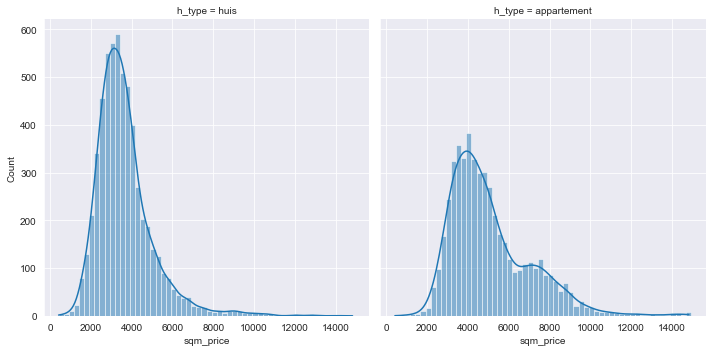

In [23]:
plt.figure(figsize=(20, 5))
sns.displot(data=ad_data_all[(ad_data_all['h_type'].isin(['huis', 'appartement'])) & (ad_data_all['sqm_price'] < 15000)], x="sqm_price", binwidth=250, kde = True, col = 'h_type')

## Cities with the highest number of ads

In [24]:
count_city = ad_data_all.groupby(['city'], dropna=False).agg(number_of_ads=('price', 'count'), mean_price=('price', 'mean'), median_price=('price', 'median'), mean_sqm = ('livingArea', 'mean'),
                                                            mean_sqm_price = ('sqm_price', 'mean'), median_sqm_price = ('sqm_price', 'median')).reset_index()
#order by number of ads
count_city = count_city.sort_values(by=['number_of_ads'], ascending=False)
#round to 2 decimals
count_city['mean_price'] = count_city['mean_price'].round(0).astype(int)
count_city['median_price'] = count_city['median_price'].round(0).astype(int)
count_city['mean_sqm'] = count_city['mean_sqm'].round(0).astype(int)
count_city['mean_sqm_price'] = count_city['mean_sqm_price'].round(0).astype(int)
count_city['median_sqm_price'] = count_city['median_sqm_price'].round(0).astype(int)
count_city = count_city.reset_index(drop=True)
count_city[:20]

,city,number_of_ads,mean_price,median_price,mean_sqm,mean_sqm_price,median_sqm_price
0,amsterdam,1684,767980,525000,105,7030,6962
1,rotterdam,1166,523180,416000,117,4360,4090
2,den-haag,1100,517151,400000,115,4323,4030
3,utrecht,426,520323,439500,103,5111,5051
4,eindhoven,415,486971,425000,127,3822,3681
5,den-bosch,204,491473,400000,122,4018,3894
6,breda,103,469230,420000,117,3987,3876
7,zoetermeer,88,415926,348225,112,3611,3536
8,apeldoorn,85,410818,325000,108,3951,4096
9,tilburg,80,412131,325000,127,3194,3052


In this data we do not have all data from Funda. I scraped 5 cites - more or less - completely:  
* Amsterdam  
* Rotterdam  
* Den Haag  
* Utrecht  
* Eindhoven  
* Den Bosch  

But I also scraped randomly from other cites some ads that is why we have ads from other cities too.

## Cities with the highest number of ads by apartment type

In [25]:
count_city = ad_data_all.groupby(['city', 'h_type'], dropna=False).agg(number_of_ads=('price', 'count'), mean_price=('price', 'mean'), median_price=('price', 'median'), mean_sqm = ('livingArea', 'mean'),
                                                            mean_sqm_price = ('sqm_price', 'mean'), median_sqm_price = ('sqm_price', 'median')).reset_index()
#order by number of ads
count_city = count_city.sort_values(by=['number_of_ads'], ascending=False)
#round to 2 decimals
count_city['mean_price'] = count_city['mean_price'].round(0).astype(int)
count_city['median_price'] = count_city['median_price'].round(0).astype(int)
count_city['mean_sqm'] = count_city['mean_sqm'].round(0).astype(int)
count_city['mean_sqm_price'] = count_city['mean_sqm_price'].round(0).astype(int)
count_city['median_sqm_price'] = count_city['median_sqm_price'].round(0).astype(int)
count_city = count_city.reset_index(drop=True)

count_city = count_city[count_city['number_of_ads'] >= 30].sort_values(by=['median_sqm_price'], ascending=False)
count_city = count_city.reset_index(drop=True)
count_city

,city,h_type,number_of_ads,mean_price,median_price,mean_sqm,mean_sqm_price,median_sqm_price
0,amsterdam,appartement,1414,714030,499000,95,7147,7137
1,amsterdam,huis,270,1050520,650000,153,6413,5678
2,haarlem,appartement,43,432066,369000,87,5187,5250
3,hilversum,huis,44,798170,622000,153,5011,5146
4,utrecht,huis,189,623484,549000,123,5112,5072
5,haarlem,huis,33,566242,550000,110,5114,5042
6,utrecht,appartement,237,438056,349500,87,5110,5000
7,apeldoorn,appartement,39,295705,269500,71,4192,4465
8,rotterdam,appartement,817,491551,385000,104,4539,4375
9,breda,appartement,46,481972,432500,105,4440,4322


# We can filter for only one city and look at what is going on within one

## In this case we filter for Rotterdam because that is where I live

In [26]:
rotterdam_data = ad_data_all[ad_data_all['city'] == 'rotterdam']

## Histogram of Rotterdam house and apartment sqm prices together

<AxesSubplot:xlabel='sqm_price', ylabel='Count'>

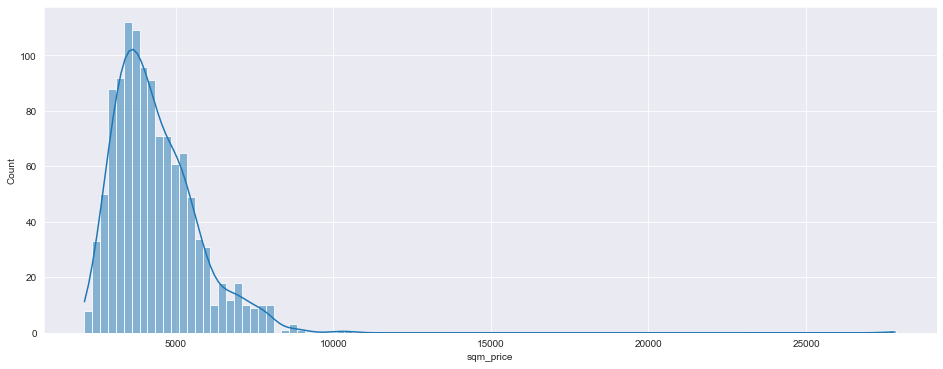

In [27]:
plt.figure(figsize=(16, 6))
sns.histplot(data=rotterdam_data, x="sqm_price", binwidth=250, kde = True)

We can see that the distribution has extreme values, we can check which house/ apartment have more than 10.000 euro sqm price.

In [28]:
inspect_data = rotterdam_data[['address', 'postcode_city', 'postcode', 'City', 'ad_link', 'Asking price', 'Living area','price', 'livingArea', 'sqm_price']]
inspect_data = inspect_data[inspect_data['sqm_price'] > 10000]

print(inspect_data['ad_link'].tolist())
inspect_data

['https://www.funda.nl/en/koop/rotterdam/huis-88871705-straatweg-127/?navigateSource=resultlist', 'https://www.funda.nl/en/koop/rotterdam/huis-42680992-plasoord-27/?navigateSource=resultlist', 'https://www.funda.nl/en/koop/rotterdam/appartement-88970171-boompjes-666/?navigateSource=resultlist']


,address,postcode_city,postcode,City,ad_link,Asking price,Living area,price,livingArea,sqm_price
88,Straatweg 127,3054 AC Rotterdam,3054 AC,Rotterdam,https://www.funda.nl/en/koop/rotterdam/huis-88...,"€ 5,000,000 kosten koper",180 m²,5000000,180,27778.0
285,Plasoord 27,3054 LJ Rotterdam,3054 LJ,Rotterdam,https://www.funda.nl/en/koop/rotterdam/huis-42...,"€ 2,350,000 kosten koper",225 m²,2350000,225,10444.0
389,Boompjes 666,3011 XZ Rotterdam,3011 XZ,Rotterdam,https://www.funda.nl/en/koop/rotterdam/apparte...,"€ 570,000 kosten koper",56 m²,570000,56,10179.0


## Histogram of Rotterdam house and apartment sqm prices

<Figure size 1152x432 with 0 Axes>

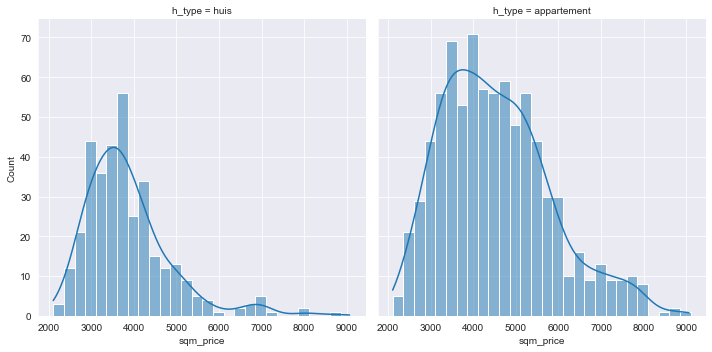

In [29]:
plt.figure(figsize=(16, 6))
sns.displot(data=rotterdam_data[(rotterdam_data['h_type'].isin(['huis', 'appartement'])) & (rotterdam_data['sqm_price'] < 10000)], x="sqm_price", binwidth=250, kde = True, col = 'h_type')